In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df=pd.read_csv("FinalDataset.csv")

In [5]:
df.head()

,Unnamed: 0,combined_text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",0
1,1,U.S. military to accept transgender recruits o...,0
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,3,FBI Russia probe helped by Australian diplomat...,0
4,4,Trump wants Postal Service to charge 'much mor...,0


In [5]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df = df[df['combined_text'].apply(lambda x: isinstance(x, str))]

In [7]:
y = df["label"].values
# Removing punctuation and useless words
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df["combined_text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)


In [8]:
df

,Unnamed: 0,combined_text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",0
1,1,U.S. military to accept transgender recruits o...,0
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,3,FBI Russia probe helped by Australian diplomat...,0
4,4,Trump wants Postal Service to charge 'much mor...,0
...,...,...,...
63117,72108,Kris Kobach: Democrats Already Attacking Elect...,0
63118,72109,Police Are Now Warning People To Take A Photo ...,1
63119,72117,"Tested by Russia, NATO Struggles to Stay Credi...",0
63120,72123,"Dallas, Roger Federer, Hillary Clinton: Your F...",0


In [9]:
X[:1]

[['budget',
  'fight',
  'looms',
  'republicans',
  'flip',
  'fiscal',
  'script',
  'washington',
  'reuters',
  'head',
  'conservative',
  'republican',
  'faction',
  'congress',
  'voted',
  'month',
  'huge',
  'expansion',
  'national',
  'debt',
  'pay',
  'tax',
  'cuts',
  'called',
  'fiscal',
  'conservative',
  'sunday',
  'urged',
  'budget',
  'restraint',
  '2018',
  'keeping',
  'sharp',
  'pivot',
  'way',
  'among',
  'republicans',
  'representative',
  'mark',
  'meadows',
  'speaking',
  'cbs',
  'face',
  'nation',
  'drew',
  'hard',
  'line',
  'federal',
  'spending',
  'lawmakers',
  'bracing',
  'battle',
  'january',
  'return',
  'holidays',
  'wednesday',
  'lawmakers',
  'begin',
  'trying',
  'pass',
  'federal',
  'budget',
  'fight',
  'likely',
  'linked',
  'issues',
  'immigration',
  'policy',
  'even',
  'november',
  'congressional',
  'election',
  'campaigns',
  'approach',
  'republicans',
  'seek',
  'keep',
  'control',
  'congress',
  'p

In [10]:
import gensim

In [11]:
EMBEDDING_DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)
words = list(w2v_model.wv.index_to_key)
len(words)

243909

In [12]:
w2v_model.wv["house"]

array([-1.1248957 ,  1.791295  , -1.0677317 , -1.911339  ,  3.8071132 ,
        1.9662032 ,  2.4850256 , -3.6131506 ,  2.1099725 ,  0.71248025,
       -2.563874  , -3.4910066 ,  2.0140488 , -3.6324883 ,  0.48768723,
       -1.7568052 ,  3.6754122 ,  2.687256  ,  1.6061199 ,  2.0156872 ,
       -2.6695945 , -0.7058027 , -4.7716866 ,  0.8927717 , -4.0206146 ,
       -2.6510766 ,  1.5332013 , -1.3739194 ,  5.330484  , -1.6613712 ,
        1.2069558 ,  2.1351347 ,  1.6082405 ,  3.1311474 ,  0.24862635,
       -0.08949088, -4.4685125 ,  1.3879026 , -0.80580425,  0.01818434,
        1.6987386 , -0.7490962 , -0.6732319 ,  1.1934509 ,  2.246707  ,
        0.01881367,  2.9455953 , -3.953993  ,  1.1761416 ,  1.2886609 ,
        3.2523234 ,  5.203584  ,  6.030929  ,  2.06489   ,  0.6292108 ,
        1.3700136 , -1.9479749 , -5.237422  , -0.09573597,  0.18291798,
       -0.7049492 ,  0.16898881,  0.9666578 , -1.1834164 ,  1.6717844 ,
        0.81727254, -1.0241734 , -2.4798927 , -0.12295304, -3.03

In [13]:
w2v_model.wv.most_similar (positive=["trump", "obama", "clinton"])

[('bush', 0.5635788440704346),
 ('hillary', 0.5482673048973083),
 ('sanders', 0.5431396961212158),
 ('elect', 0.5344852209091187),
 ('donald', 0.5218788981437683),
 ('yet', 0.5153979063034058),
 ('cruz', 0.5115275382995605),
 ('incoming', 0.5107570886611938),
 ('however', 0.5095996260643005),
 ('even', 0.4949284493923187)]

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [15]:
#first 10 words of first news, every word has been represented with a number 
X[0][:10]

[492, 379, 11068, 75, 4982, 1745, 5121, 51, 41, 341]

In [16]:
word_index = tokenizer.word_index

for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break


said -> 1
trump -> 2
would -> 3
president -> 4
people -> 5
one -> 6
new -> 7
mr -> 8
clinton -> 9
state -> 10


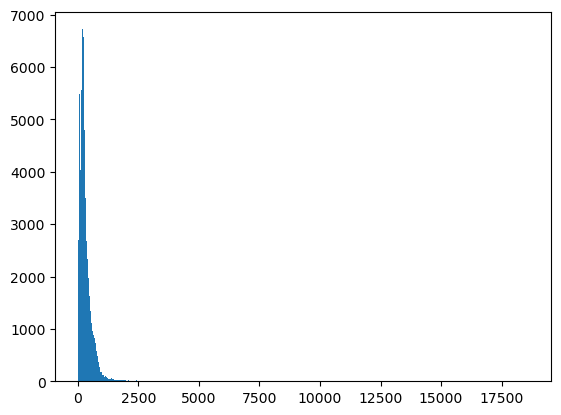

In [17]:
plt.hist([len(x) for x in X], bins=500)
plt.show()

In [18]:
len(y)

63121

In [19]:
nos = np.array([len(x) for x in X])
len(nos[nos < 700])
#out of 63k nwes articles, 58k have length less than 700 words 

58247

In [20]:
maxlen=700
X=pad_sequences(X,maxlen=maxlen)

In [21]:
len(X[1])

700

In [22]:
vocab_size=len(tokenizer.word_index)+1

In [23]:
vocab_size

243910

In [24]:
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
    return weight_matrix

embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [25]:
model = Sequential()

# Non-trainable embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))

# LSTM layer
model.add(LSTM(units=128))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          24391000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 24508377 (93.49 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 24391000 (93.04 MB)
_________________________________________________________________


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
history=model.fit(X_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
1036/1036 [==============================] - 367s 353ms/step - loss: 0.2536 - acc: 0.8987 - val_loss: 0.1927 - val_acc: 0.9271
Epoch 2/10
1036/1036 [==============================] - 354s 341ms/step - loss: 0.1324 - acc: 0.9492 - val_loss: 0.0907 - val_acc: 0.9673
Epoch 3/10
1036/1036 [==============================] - 356s 344ms/step - loss: 0.0720 - acc: 0.9733 - val_loss: 0.0710 - val_acc: 0.9748
Epoch 4/10
1036/1036 [==============================] - 358s 345ms/step - loss: 0.0540 - acc: 0.9804 - val_loss: 0.0687 - val_acc: 0.9765
Epoch 5/10
1036/1036 [==============================] - 356s 344ms/step - loss: 0.0444 - acc: 0.9835 - val_loss: 0.0672 - val_acc: 0.9749
Epoch 6/10
1036/1036 [==============================] - 355s 343ms/step - loss: 0.0283 - acc: 0.9906 - val_loss: 0.0667 - val_acc: 0.9773
Epoch 7/10
1036/1036 [==============================] - 365s 352ms/step - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0739 - val_acc: 0.9762
Epoch 8/10
1036/1036 [============

In [28]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")
y_pred

494/494 [==============================] - 47s 95ms/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [29]:
accuracy_score(y_test,y_pred)

0.9771877574298207

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8699
           1       0.97      0.98      0.97      7082

    accuracy                           0.98     15781
   macro avg       0.98      0.98      0.98     15781
weighted avg       0.98      0.98      0.98     15781



In [31]:
tester=["A high-risk, high-return strategy, microcap stocks are those whose market-capitalisation falls below Rs 3,000 crore. If picked with care and backed by good research, these stocks can give a big kicker in returns. And market correction presents a good opportunity to do quality picking."]
tf_tester=tokenizer.texts_to_sequences(tester)
tf_tester=pad_sequences(tf_tester, maxlen=maxlen)
tester2=["Narendra Modi is giving out Trillions of dollars to the farmers to help them with the recent crop failure, Naman Tanwar, a farmer who lost his life earnings in a crop failure recently became a billionare after this donation"]
tf_tester2=tokenizer.texts_to_sequences(tester2)
tf_tester2=pad_sequences(tf_tester2, maxlen=maxlen)
tester3=["The three-day survey of the complex being done by the Commission concluded on Monday at noon, with officials saying that the findings of the survey were “confidential”."]
tf_tester3=tokenizer.texts_to_sequences(tester3)
tf_tester3=pad_sequences(tf_tester3, maxlen=maxlen)
tester4=["Afghanistan crisis is primarily the fault of America"]
tf_tester4=tokenizer.texts_to_sequences(tester4)
tf_tester=pad_sequences(tf_tester4, maxlen=maxlen)
tester5=["this is a news article that is obviously fake"]
tf_tester5=tokenizer.texts_to_sequences(tester5)
tf_tester5=pad_sequences(tf_tester5, maxlen=maxlen)

In [52]:
x=(model.predict(tf_tester2)>=0.5).astype(int)
x

1/1 [==============================] - 0s 34ms/step


array([[1]])

In [53]:
if(x==0):
    print("This news is real according to Deep Learning Model")
if(x==1):
    print("This news is fake according to Deep Learning Model")

This news is fake according to Deep Learning Model


In [34]:
import matplotlib.pyplot as plt

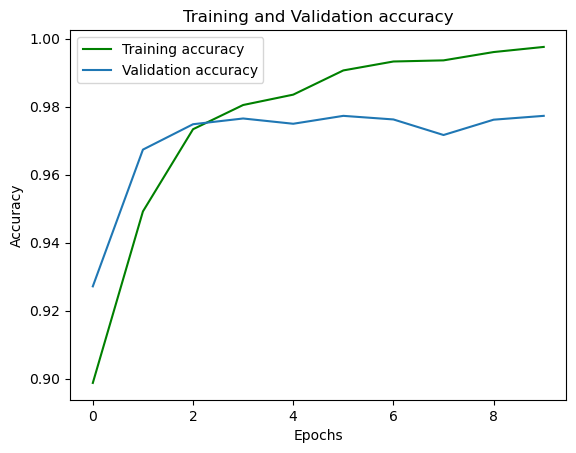

In [46]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(0, 10)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8456  243]
 [ 117 6965]]


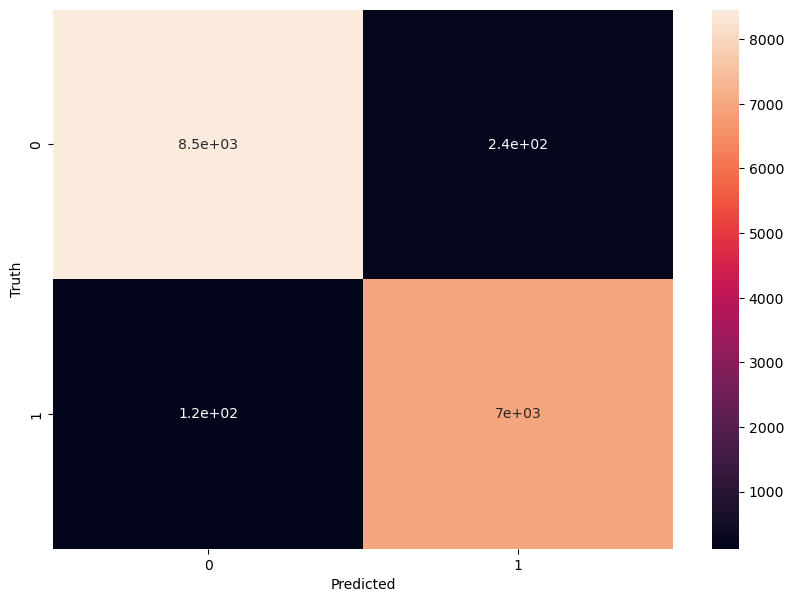

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

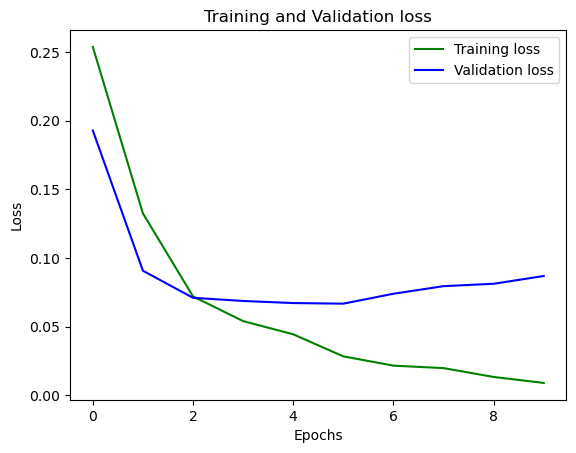

In [47]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']  # Corrected the key to 'val_loss'
epochs = range(0,10)  # Start epochs from 1

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')  # Corrected the syntax here
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
from keras.models import load_model
import pickle 
model.save ("DeepLearninlModel.h5")
pickle.dump(tokenizer, open("tokeniser.pickle", "wb"))